In [6]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import warnings; 
warnings.simplefilter('ignore')

In [7]:
data = tf.keras.datasets.fashion_mnist

In [8]:
(X_train, y_train), (X_test, y_test) = data.load_data()

In [ ]:


    0 T-shirt/top
    1 Trouser
    2 Pullover
    3 Dress
    4 Coat
    5 Sandal
    6 Shirt
    7 Sneaker
    8 Bag
    9 Ankle boot 

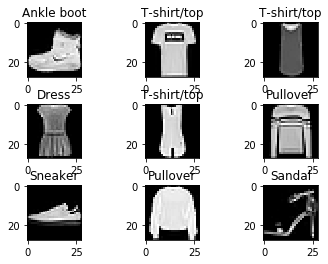

In [28]:
label = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker",
         8: "Bag", 9: "Ankle boot"}

for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.title(label[y_train[i]])
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.subplots_adjust(hspace=.5)
# show the figure
plt.show()

#### normalizing values between 0 - 1

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [16]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
                             tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = "sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=30)

Epoch 1/30
60000/60000 [==============================] - 5s 81us/step - loss: 0.4746 - acc: 0.8300
Epoch 2/30
60000/60000 [==============================] - 5s 77us/step - loss: 0.3595 - acc: 0.8678
Epoch 3/30
60000/60000 [==============================] - 5s 77us/step - loss: 0.3222 - acc: 0.8814
Epoch 4/30
60000/60000 [==============================] - 5s 77us/step - loss: 0.2996 - acc: 0.8890
Epoch 5/30
60000/60000 [==============================] - 5s 77us/step - loss: 0.2810 - acc: 0.8956
Epoch 6/30
60000/60000 [==============================] - 5s 78us/step - loss: 0.2653 - acc: 0.9001
Epoch 7/30
60000/60000 [==============================] - 5s 78us/step - loss: 0.2533 - acc: 0.9060
Epoch 8/30
60000/60000 [==============================] - 5s 78us/step - loss: 0.2433 - acc: 0.9083
Epoch 9/30
60000/60000 [==============================] - 5s 78us/step - loss: 0.2323 - acc: 0.9126
Epoch 10/30
60000/60000 [==============================] - 5s 78us/step - loss: 0.2226 - acc: 0.9154

In [17]:
y_pred = model.predict(X_test)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

9


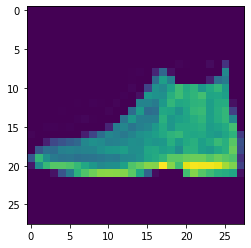

In [18]:
plt.imshow(X_test[0])
print(np.argmax(y_pred[0]))

In [19]:
acc = model.evaluate(X_test, y_test)
print("Accuracy: ", acc[1])

10000/10000 [==============================] - 0s 37us/step
Accuracy:  0.8933


## Add some convolution layers to improve the accuaracy

In [22]:
(X_train_cnn, y_train_ccn), (X_test_cnn, y_test_cnn) = data.load_data()
#reshape to fit the cnn input layers
X_train_cnn = X_train_cnn.reshape(X_train_cnn.shape[0], 28, 28, 1)
X_test_cnn = X_test_cnn.reshape(X_test_cnn.shape[0], 28, 28, 1)
#normalize
X_train_cnn = X_train_cnn / 255.0
X_test_cnn = X_test_cnn / 255.0


In [24]:
#build model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = "sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(X_train_cnn, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 21s 355us/step - loss: 0.4428 - acc: 0.8384
Epoch 2/10
60000/60000 [==============================] - 18s 300us/step - loss: 0.2930 - acc: 0.8924
Epoch 3/10
60000/60000 [==============================] - 18s 301us/step - loss: 0.2510 - acc: 0.9072
Epoch 4/10
60000/60000 [==============================] - 18s 305us/step - loss: 0.2183 - acc: 0.9183
Epoch 5/10
60000/60000 [==============================] - 18s 300us/step - loss: 0.1911 - acc: 0.9282
Epoch 6/10
60000/60000 [==============================] - 18s 298us/step - loss: 0.1691 - acc: 0.9367
Epoch 7/10
60000/60000 [==============================] - 18s 294us/step - loss: 0.1498 - acc: 0.9438
Epoch 8/10
60000/60000 [==============================] - 18s 298us/step - loss: 0.1303 - acc: 0.9511
Epoch 9/10
60000/60000 [==============================] - 18s 296us/step - loss: 0.1154 - acc: 0.9556
Epoch 10/10
60000/60000 [==============================] - 18s 297us/step - loss: 

In [25]:
test_loss, acc = model.evaluate(X_test_cnn, y_test_cnn)
print(f'Test loss: {test_loss}, accuracy: {acc}')

10000/10000 [==============================] - 1s 123us/step
Test loss: 0.3230583199292421, accuracy: 0.9047


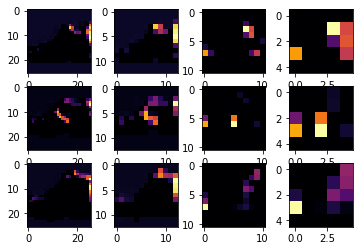

In [27]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 6
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(X_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(X_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(X_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)